# The Bare Minimum about Floating-Point

## Warning: Reading this requires care.

To a first approximation, no-one likes thinking carefully about floating-point numbers.  Most people think that floats are finicky, tedious, and boring. Isn't that why we have computers, to do that sort of thing? Most everyone just wants floating-point arithmetic to work, fast and without giving problems.  But there comes a time when you <i>have</i> to think about them.  This notebook tries to give the absolute minimum that you need to know, so that (most of the time) you can forget about them (but still be ready when their peculiarities strike). <b>In fact, we're going to assume that you have already seen something weird about decimal arithmetic on a computer, and are looking here for answers.</b>  You'll get them, but it's not that simple.

To make it more complicated, there is a <A HREF="https://en.wikipedia.org/wiki/IEEE_754">standard for floating-point arithmetic laid out by the IEEE that is now over 35 years old </A>: it's very well-known, and very very good; but unfortunately,  not everyone knows about it or follows it, and so not everyone supports it (we do---it makes life so much easier). Indeed a lot of machines and computer languages do, and so we use it here, because you need to know something about it.  But when it is <b>not</b> supported, it's like barking your shin on a piece of furniture in the dark: not fun.  Sadly, we will see an example below, with Python native floating-point arithmetic (which is, quite surprisingly, not the same as NumPy floating-point arithmetic, which is different from SymPy floating-point arithmetic.  Yay.).

Reading about this topic requires close attention.  You have to read every word, and not just the words, but also the actual code and its output.  You have to look at the graphs and think about why they look the way they do (instead of how they would look if we used theoretical real arithmetic, or arbitrary precision arithmetic).  You have to look at the fine details of the numerical output (and sometimes you can only see what's going on if you use <i>hexadecimal</i> notation).  Understanding floating-point arithmetic even requires <i>a painful reversal of understanding</i> and <i>unlearning</i> some things.  Sometimes, this will not seem like fun.  (...although, there's a certain satisfaction in understanding what's really going on.)

Most writers don't like it, either.  Most start off thinking that they can convey the essentials of floating point in a really short time and space with a minimum of fuss, concentrating on just exactly what you can use to avoid learning all the horrible details. <b>Um, no. We can't do it either</b>.  This section wound up being much longer than we wanted to write, and it's almost certainly longer than you want to read.  And, it's hard to read, too, being full of ugly details.  Well, we'll try to point you at some useful videos, too.  You can start with one by <A HREF="https://youtu.be/PZRI1IfStY0"> Computerphile</A>, which is very good.  That may help you to read what follows.  But, be warned: you'll need to take a deep breath each time you start to read again.

So if (when!) you want a break from learning about floating-point arithmetic, go for it.  Take a break, then come back and re-read. For whimsical relaxation that's still (sort of) on topic, we suggest listening to the music of <A HREF="https://youtu.be/yYqu5NdFMf8"> Floating Points</A>. We think it's seriously good: Sam Shepard, the artist, has a PhD in Neuroscience from University College London; whether he chose the name with any reference to floating-point arithmetic we don't know, but maybe.  Listening might help you to come back in the mood for more details.  Or, well, there's always <A HREF="https://youtu.be/Zqd_R5Rq6KM"> Rachmaninov, played by the great Leslie Howard.</A>


## What you will want to get from this notebook

1. Why we use floating-point arithmetic, even though it causes headaches (In short: it forestalls or alleviates much worse trouble)
2. A sense in which floats are better models of reality than the real numbers are
3. How to recognize when floating-point effects ("rounding errors") are adding up and making a difference
4. What's a rounding error, anyway?
5. What happens when your significant figures cancel each other, and other ways to lose accuracy
6. The difference between accuracy and precision
7. How to predict when problems <i>might</i> arise, and when instead to be confident (actually, most of the time!)
8. How to model floating-point arithmetic with the epsilon-delta tools from real analysis (yes, that's right: the tools of real analysis make numerical analysis <i>easier</i>---don't be dismayed, this is actually kind of cool).
9. The basic constants: unit roundoff $\mu$, machine epsilon $\varepsilon$, the largest representable real number (often called realmax), the smallest representable positive real number (often called realmin)
10. What happens when the numbers <i>overflow</i> (get bigger than realmax) or <i>underflow</i> (get smaller than realmin)
11. Why machine epsilon $\varepsilon$ is usually more important than the (much smaller) realmin.
12. Where to look for more information (when you wind up really needing it). 
    1. Yes, <A HREF="https://en.wikipedia.org/wiki/Floating-point_arithmetic"> Wikipedia </A> is a really good place to start (although, good grief, there is a lot of information densely packed there).
    2. Then there is the <A HREF="https://docs.python.org/3/tutorial/floatingpoint.html">Python floating-point tutorial</A>
    3. and the old classic <A HREF="https://dl.acm.org/doi/10.1145/103162.103163">What every computer scientist should know about Floating-Point Arithmetic</A>.
    4. An excellent slim textbook (maybe the best reference) is <A HREF="https://cs.nyu.edu/overton/book/">Michael Overton, Numerical Computing with IEEE Floating-Point Arithmetic</A>.
    5. Many references at <A HREF="https://people.eecs.berkeley.edu/~wkahan/ieee754status/"> William (Velvel) Kahan's page </A> 
    6. The wonderful book <A HREF="https://epubs.siam.org/doi/book/10.1137/1.9780898718027">Accuracy and Stability of Numerical Algorithms</A> by <A HREF="https://nhigham.com/">Nicholas J. Higham</A> </li>
    7. The book <A HREF="https://www.springer.com/gp/book/9781461484523"> A Graduate Introduction to Numerical Methods </A> by Corless and Fillion.

### Floats versus the Real World

Let's begin by thinking of something really, really small: the nanofibers making up the fine strands of the finest spider silk, that of the (venomous, of course) brown recluse spider.  According to <A href="https://pubs.acs.org/doi/10.1021/acsmacrolett.8b00678"> this article from ACS Macro Letters </A> which has some really cool pictures (of fine silk fibres, not so many of spiders, thankfully enough if you don't like spiders much), the nanofibers average about $20$nm in width---in scientific notation, that is about $20\cdot 10^{-9}$ metres wide.  Very hard to see, even with the best equipment.

As an aside, if you <b>do</b> like spiders, we recommend some <A HREF="https://youtu.be/d_yYC5r8xMI">really cool videos with dancing Peacock Spiders (genus Maratus) by Jürgen Otto</A>.  The spiders are typically smaller than your little fingernail (length 4--5mm), absolutely harmless, and really cool to watch.  Anyway, back to work. (Sorry if we sent you down a rabbit hole (spider hole)).

Machine epsilon (we'll learn what that means) for <i>IEEE Standard 754 double precision</i> floating point arithmetic is $2^{-52} \approx 2.2\cdot 10^{-16}$, or about $20 \cdot 10^{-17}$.  Machine epsilon, compared to the unit $1$, is therefore $10^8$ (one hundred million) times finer than those nanofibers of spider silk are when compared to a metre.  You can compare double precision machine epsilon to the size of a proton, even, which has a width about $10^{-15}$m.  In other words, double precision can resolve things about ten times smaller than a proton, compared to everyday scales.

<b> A basic fact: </b> Floating-point numbers are represented by a fixed number of bits.  IEEE double-precision numbers use just $64$ bits, which means that there are at most $2^{64} \approx 1.85\cdot 10^{19}$ distinct such numbers.  (Actually there are fewer than that, because there are some special codes sprinkled in there).  That sounds like a lot, but it means that there is a <i>largest representable number</i>, a <i>smallest positive number</i>, and other strange things that are not true of the real number system, including weirdnesses such as nonzero numbers $x$ that are so small that adding them to $1$ doesn't change it: $1 + x = 1$ with $x$ <i>not</i> being zero.  This causes brain-hurt, so if you want to take a break for a bit, go ahead.

(In fact, the machine epsilon $\varepsilon$ is often (sort of) defined as the smallest machine number for which $1+\varepsilon$ winds up being bigger than $1$; it's actually a bit trickier than that, as you will see below.)

In [1]:
import numpy as np
import sys

unity = 1.0
small = 1.0e-22
ouch = unity + small
print( 'one plus 10**(-22) equals ', ouch, ' in floats; in hexadecimal, we can see it really is:', ouch.hex() )
eps = sys.float_info.epsilon
print('machine epsilon in decimal is ', eps, 'and in hex it is 2**(-52): ', eps.hex() )
ah = unity + eps
print( 'one plus machine epsilon equals ', ah, 'in floats: in hex we can see it exactly:', ah.hex())
eh = unity + 2*eps/3
print( 'adding 2/3 of epsilon to one gets', eh.hex())
uh = unity + eps/2
print( 'adding half of epsilon to one gets ', uh.hex() )

one plus 10**(-22) equals  1.0  in floats; in hexadecimal, we can see it really is: 0x1.0000000000000p+0
machine epsilon in decimal is  2.220446049250313e-16 and in hex it is 2**(-52):  0x1.0000000000000p-52
one plus machine epsilon equals  1.0000000000000002 in floats: in hex we can see it exactly: 0x1.0000000000001p+0
adding 2/3 of epsilon to one gets 0x1.0000000000001p+0
adding half of epsilon to one gets  0x1.0000000000000p+0


Most floating-point arithmetic nowadays uses double precision; sometimes double-double (or "quad") precision is used, which is absurdly more precise; less frequently but sometimes just <i>single</i> precision is used, which has machine epsilon $2^{-23} \approx 1.2\cdot 10^{-7}$ (so about six times the width of an average spider nanofibre); and nowadays especially in applications where there is a <i>lot</i> of data, <i>half</i>-precision can be used, which has machine epsilon $2^{-10} \approx 10^{-3}$; note that the average width of a human hair is about $1.8\cdot 10^{-4}$m, so half precision has a fineness about five human hairs' width.  Compare that to spider silk, and we see that the comparison human hair::half precision is more or less the same as spider fibre::single precision.  Double precision takes that down to nuclear structure fineness.

So how could that degree of fineness ever cause problems in ordinary arithmetic?  Well, most of the time---really, very much most of the time---it does not.  The IEEE 754 standard was designed to do as good a job as possible, given the constraint that we want memory access to be predictable (and therefore memory operations on computers will be fast).

But sometimes it goes off the rails, and we need to understand how, and why.

### Rounding Errors Can Grow in Relative Importance (sometimes quickly)

The fundamental reason it goes off the rails is that it <i>has to</i>.  We give you no less an Authority than Aristotle himself: in "On the Heavens" written 350BCE we find

<A HREF="http://classics.mit.edu/Aristotle/heavens.1.i.html"> Admit, for instance, the existence of a minimum magnitude, and you will find that the minimum which you have introduced, small as it is, causes the greatest truths of mathematics to totter. </A>

What could this mean for modern computers?  Consider the following simple little bits of arithmetic.

In [2]:
 ( -7.35e22 + 7.35e22) + 100.0

100.0

In [3]:
 -7.35e22 + (7.35e22 + 100.0 )

0.0

Those answers are different, although to your eyes those instructions should give the same answer.

All we did there was do the operations in a different order.  Real arithmetic is associative: (a+b)+c = a+(b+c), end of story.  But in floating-point, this is <i>not so</i>.  Both those answers are correct (even IEEE standard!), and actually what we <i>want</i> when we do floating-point arithmetic (that may be hard to believe, when the second answer is so clearly "wrong" in real arithmetic).

But ok, you say.  Big deal, you say. Those numbers are different on a nuclear scale.  Or, rather, on an astronomical scale: if the $100$ represents the mass of a person in kilograms, then $7.35e22$ is about the mass of the Earth's Moon.  If we threw an anti-moon at the moon and it all vanished in a blaze of energy, it wouldn't matter much if there was a person standing on the moon or not when that happened; but if you put the human there after the anti-moon destroyed the moon, you'd still have the person. (Well, if the spacesuit was good, anyway.)

Incidentally, the main benefit of floating-point arithmetic (as opposed to fixed-point arithmetic) is the <i>dynamic range</i>. It is equally useful talking about things on astronomical scales, normal scales, or nuclear scales, or indeed even more scales: there is an <i>exponent</i>, as in scientific notation (which floating-point translates to, readily), and a number of significant "digits" (actually, bits) called the <i>significand</i> or <i>mantissa</i>.  More soon.

The really annoying thing is that floating-point differences (called "rounding errors") can sometimes add up rapidly and show up unexpectedly, even with very few innocuous-looking operations.  Let's look at another example, namely plotting $(x-1/3)^2$,  and let's zoom in on the region around $x=1/3$.  We all remember from high school (right, we all remember) what the graph <i> should</i> look like, and indeed on a "human" scale it does:

In [4]:
from matplotlib import pyplot as plt

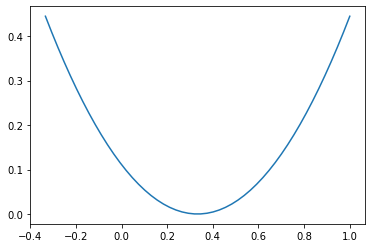

In [5]:
poly = np.poly1d([1.0, -2.0/3.0, 1.0/9.0])
x = np.linspace(-1/3,1)
y = poly(x)
plt.plot(x,y)
plt.show() 

Now let's zoom in: instead of a nice smooth curve (even on a nuclear scale) we see flat spots---on the spider silk scale in the x-direction!

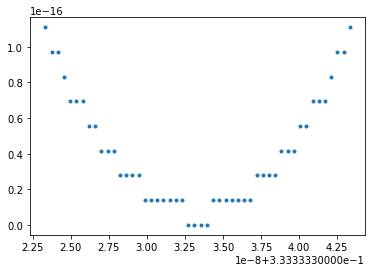

In [6]:
poly = np.poly1d([1.0, -2.0/3.0, 1.0/9.0])
x = np.linspace(1/3-1.0e-8,1/3+1.0e-8)
y = poly(x)
plt.plot(x,y,".")
plt.show()

That's actually not bad, and kind of pretty.  You can see that the floating-point numbers, which are discrete, seem to be <i>trying</i> to represent a nice smooth function. There <i>are no double-precision floating point numbers</i> on the vertical scale between the flat layers, but in spite of that the sense of the curve is conveyed fairly well.

Let's try a more complicated polynomial (after all, for that last example we hardly needed a computer).  This next one one is $(3x-1)^5(x-2)$, expanded.  On a human scale, all looks more or less well.

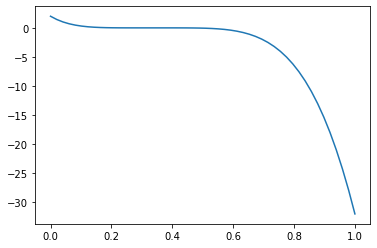

In [7]:
poly = np.poly1d([243., -891., 1080., -630., 195., -31., 2.])
x = np.linspace(0,1)
y = poly(x)
plt.plot(x,y)
plt.show()

Now zoom in on the zero at $x=1/10$.

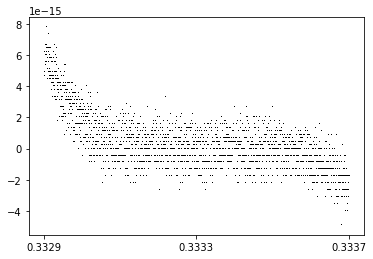

In [8]:
poly = np.poly1d([243., -891., 1080., -630., 195., -31., 2.])
c = 0.3333
delt = 4.0e-4
x = np.linspace(c-delt,c+delt,2021)
y = poly(x)
plt.plot(x,y,"k,")
plt.xticks([c-delt, c, c+delt])
plt.show()

Now, on the scale of about <b>the width of four or five human hairs</b> (even though we are using nuclear-fine arithmetic!), we see all <i>kinds</i> of weirdness.  This is what rounding error looks like, when you zoom in. (Don't connect the dots, it just looks like a mess.)

Even though the values are all fairly small on the $y$-axis, this is kind of a disaster.  Evaluating that polynomial takes only six operations at each point; we have evaluated it at each of $2021$ points, near to the zero at $x=1/3$.  But deciding from the plot where the zero is is now pretty difficult.  If we didn't know ahead of time where it was, we'd be out of luck.  Even next-door points might go seemingly unpredictably to one flat layer or another.  The x-scale is $\pm 4\cdot 10^{-4}$, about the width of a few human hairs, as we said.

And we haven't gone beyond a degree six polynomial, and the coefficients are all modestly sized.  How much more difficulty are we going to find in real-life-sized problems?

Actually, there are some real difficulties with floating-point in real-life problems. <A HREF="https://en.wikipedia.org/wiki/Cluster_(spacecraft)">Maybe the most famous is the loss of the Ariane 5</A> although that was a conversion error that caused a cascading failure, not a rounding error.  But floating-point doesn't cause all that many problems, really, and <i>most</i> of those are going to show up in obvious ways.  But there are a nasty few that can cause the worst kinds of problems and give you wrong but <i>plausible</i> answers.  These are the ones  you need to know about.

<b> An example with no subtractions </b>

Here's a nasty one.  Take a simple number, such as 6.0.  Take its square root, then take the square root of that, and so on 52 times.  Then take the result of that, and square it.  Then square that, then square the result, and so on 52 times, again.  Square root and square are inverse operations, so we <i>ought</i> to get back to where we started from.  We don't, and this time, even though we are using nuclear-scale precision, we get answers that are wrong on a human scale (never mind being off by a hair, we are off by almost fifty percent).  This result, being done with such simple operations, ought to shock you.

The appearance of a number so close to $e$, the base of the natural logarithms, is not an accident; but we won't stop to explain that here.

In [9]:
x0 = 6.3
x = x0
for i in range(52):
  x = np.sqrt(x)
  print( 'After ', i+1, 'square roots, x is ', x, 'or in hex ', x.hex() )

for i in range(52):
  x = x*x

print( 'x started as {}, and is now {}'.format(x0,x))

After  1 square roots, x is  2.5099800796022267 or in hex  0x1.414706f9c063ap+1
After  2 square roots, x is  1.584291664941221 or in hex  0x1.959423783f78ap+0
After  3 square roots, x is  1.2586864839749496 or in hex  0x1.4239470496f27p+0
After  4 square roots, x is  1.1219119769282033 or in hex  0x1.1f359f91e5b81p+0
After  5 square roots, x is  1.0592034634234366 or in hex  0x1.0f27f54b36ae0p+0
After  6 square roots, x is  1.0291761090422944 or in hex  0x1.077815e229436p+0
After  7 square roots, x is  1.0144831733657755 or in hex  0x1.03b52b53f2c41p+0
After  8 square roots, x is  1.0072155545690185 or in hex  0x1.01d8e0eae57cfp+0
After  9 square roots, x is  1.0036012926302051 or in hex  0x1.00ec03aa11ef4p+0
After  10 square roots, x is  1.001799028064115 or in hex  0x1.0075e6aeb3309p+0
After  11 square roots, x is  1.0008991098328117 or in hex  0x1.003aec8f53d30p+0
After  12 square roots, x is  1.0004494539119964 or in hex  0x1.001d7495da63bp+0
After  13 square roots, x is  1.0002247

It's easier to see what's happening in hex; after a while, not enough decimals are printed, base 10, but in hex we see everything. We'll see in the next cell just what those hex symbols mean.

We did not print the results when squaring---they're kind of the same but backwards, and different in detail.  We have all we need, now, to explain what is going on.

The problem is <i>loss of precision</i> causing loss of accuracy.  The information about where we started from ($x=6.0$) is carried in hex digits further and further to the right, as we progressively take square roots, as you can see above as the zeros creep out from the "decimal" point.  A similar thing happens in decimal:  That information drops off the right end of the numbers each time the result is stored in the variable $x$.  When we start squaring again, we are starting from a number that has lost almost all information about where it started.  Indeed, one more square root and it would have rounded down to exactly $1$, and then when we started squaring we wouldn't have got anywhere.

This loop is a simple iteration, executing a very simple dynamical system such as are studied frequently in real-life applications.  There are other examples of similar disasters.

### What are the rules?

Computers work in binary.  Hexadecimal is basically the same thing except four times shorter: one hex digit takes four bits, so 64 bits in binary is only 16 hexadecimal places.  An IEEE 754 double precision float occupies 64 bits, or 16 hex digits.  Let's try to follow the addition $\sqrt{2} + \pi$ in double precision.

In [10]:
import math
root2float = np.sqrt(2.0)
pifloat = math.pi
modest = 100.35
print( root2float.hex() )
print( pifloat.hex() )
print( modest.hex() )

0x1.6a09e667f3bcdp+0
0x1.921fb54442d18p+1
0x1.9166666666666p+6


What you are looking at there is a human-readable version of the internal representation of the two floating-point approximations to $\sqrt2$ and to $\pi$, together with a modestly bigger number chosen more or less at random.  Neither of the first two numbers can be represented exactly as a finite decimal, binary, or hexadecimal number, of course (although both are "computable" in a technical sense: we can get as many digits of either as we could possibly want).  The third has a terminating decimal representation but a <i>nonterminating</i> hex representation (this was a lucky accident). Asking Matlab to use "format hex" actually shows the internal representations: $\sqrt2$ is represented as "3ff6a09e667f3bcd" using exactly 16 hexadecimal digits, and $\pi$ is represented as "400921fb54442d18" which at first glance look baffling, and bafflingly different to those representations above.  But the first three hex "digits" of each of those are used for the <i>sign bit</i> and the 11-bit <i>exponent</i> in a <i>biased format</i> which we'll ignore for a moment.  After those three "digits" we see the sequence "6a09e667f3bcd" from Matlab and that's exactly the string after the "decimal" point for $\sqrt2$; similarly, the $13$ hexadecimal digits after the "decimal" point for $\pi$ show up in the Matlab string as the final $13$ hexadecimal digits in Python.

Hexadecimal digits are in a one-to-one correspondence with the following numbers.  We put them in decimal--hex--binary.
Here they are typed by hand:

00--1--0000

01--1--0001

02--2--0010

03--3--0011

04--4--0100

05--5--0101

06--6--0110

07--7--0111

08--8--1000

09--9--1001

10--a--1010

11--b--1011

12--c--1100

13--d--1101

14--e--1110

15--f--1111

and here they are tabulated  automatically (with decorations 0x meaning hex and 0b meaning binary).  The leading binary 0 bits are trimmed below, which makes the correspondence with hex somewhat less intelligible: four bits to a hex digit is the point.


In [11]:
from tabulate import tabulate

results = [(n, hex(n), bin(n)) for n in range(16)]
print(tabulate(results, headers=["decimal", "hex", "binary"]))


ModuleNotFoundError: No module named 'tabulate'

You can also use capital letters, A (hex) for 10 (decimal) and 1010 (binary), and so on, to F for 15.  16 in decimal is thus 10 in hex or 10000 in binary.  Translating groups of four bits to hex is easy, and translating a hex "digit" to binary is just as easy.  Binary to decimal and decimal to binary (with fractional parts), on the other hand, is annoyingly full of special cases that cause headaches.

So what does the Python format 0x1.6a09e667f3bcdp+0 mean? This seems weird at first, and then gets a bit weirder, because it actually uses binary in the exponent, p+0 means times 2 to the 0 and p+1 means $\cdot 2^1$ and p+6 means $\cdot 2^6$ so that number is bigger than $64$ (which we knew, of course). As we said before, the 0x means hex.  The 1. means there is a 1 before the "decimal" point.  (For "normal" numbers this is always true so we don't even have to store it---this gives us what is called a "hidden bit").  Then after the "decimal" point comes a string of hex digits, meaning $6/16 + a/16^2 + 0/16^3 + 9/16^4 + e/16^5 + 6/16^6 + 6/16^7 + 7/16^8 + f/16^9 + 3/16^{10} + b/16^{11} + c/16^{12} + d/16^{13}$.  Using exact rational arithmetic, that adds up to $6369051672525773/4503599627370496$ (including the leading 1).

Ick.  There's the other reason we like scientific notation.  It's hard even to see if that exact rational is bigger than $1$ or not.  We'll convert it to decimal in a minute, and we'll see that it makes more sense to humans that way.  If we square it exactly as a rational number (mercifully keeping the computation to ourselves, but go ahead and do it yourself if you like), we get a rational number <i>just</i> a little bigger than $2$; it is $2$ plus $5545866846675497/20282409603651670423947251286016$, which is about $2.73\cdot 10^{-16}$.  It's no coincidence that this is about the same size as the machine epsilon for double precision.  If we convert the rational number $6369051672525773/4503599627370496$ to a decimal number, we get $1.4142135623730951\ldots$ which, if we were going to report only to five significant figures, we would round to $1.4142$. That accuracy after rounding is enough to get us the distance corner-to-corner of a square one kilometer on a side accurate to better than $10$cm.  If we hadn't rounded, and instead used all figures, it would be precise to a tenth of a billionth of a millimeter.  We don't say <i>accurate</i> there because how could we measure the angles of a square to that much accuracy? That's about 100 protons wide!  Precision can be spurious.

But keeping all precision <i>during</i> the computation guards against growth of rounding errors.  So, as a general rule, try to convert to decimals and round your answers only at the very end.


Now that we have talked about binary, hexadecimal, and the <b>fact that we have to approximate</b> we can talk about simple arithmetic.  Here's the IEEE rule:

```{epigraph}
Do the arithmetic (+, -, *, divide) on two operands <i>exactly correctly</i>, then round the results to the <i>nearest</i> machine representable number.  In the case of a tie, round to the <i>nearest machine representable number whose last bit is 0</i>.
```

This tie-breaking rule (which only rarely happens) is called "round-to-even" and is done to eliminate bias in long computations. (There is only one place in this notebook where we know that it happened.  Good exercise to find it.)

This is a pretty good principle, and really, how could it be better?  It's saying that the only error that's allowed is the one at the end, which you can't escape, once you have decided to store your numbers in just 64 bits (or 32 if you're using single precision, or 16 if you're using half precision).


In [12]:
root2float = np.sqrt(2.0)
pifloat = math.pi
added = root2float + pifloat
print( root2float.hex() )
print( pifloat.hex() )
print( 'sqrt(2) + pi = ', added, 'which is a few decimals translated from ', added.hex(), 'exactly in the internal hex' )

0x1.6a09e667f3bcdp+0
0x1.921fb54442d18p+1
sqrt(2) + pi =  4.555806215962888 which is a few decimals translated from  0x1.2392543c1e57fp+2 exactly in the internal hex


You should notice that Python only prints 12 significant figures there in decimal (seems to be a default printing width. In Maple, working to 20 decimal digits, we get $4.5558062159628882873$).  In order to <i>reliably</i> convert binary (or hex) to and from IEEE double precision and back again, to get exactly the same number, you have to keep about $18$ decimal places (not just sixteen as suggested by the machine epsilon; we're not sure where "twelve" comes from in that example).  There are worse problems with conversion to decimal, such as the one called <A HREF="http://perso.ens-lyon.fr/jean-michel.muller/Intro-to-TMD.htm">"The Table-Maker's Dilemma"</A> which has to do with how many bits you have to carry when evaluating an elementary function just to be sure you are going to round correctly: it's more than you think, and (perhaps very surprisingly) for some functions the full answer is not even known! But we are <i>not</i> going to go into that.  That's a hard problem for mathematical software designers.  We're just going to walk by, whistling.

Back to the sum $\sqrt2 + \pi$ above.  That hex answer is the <i>exact</i> sum of the two rational numbers represented in hex by 0x1.6a09e667f3bcdp+0 and 0x1.921fb54442d18p+1, correctly rounded back into the IEEE double precision format.  You can see already that there have been some changes from real arithmetic.  First, $\sqrt2$ had to be rounded, to $13$ hex digits plus a hidden bit; then $\pi$ had to suffer the same kind of rounding.  Then even though the arithmetic is carried out correctly, we aren't adding $\sqrt2$ and $\pi$ any more, we're adding the rational approximations thereof.  Then one final rounding happens when we put the result of that addition into a double precision float.

The details of how computer manufacturers guarantee that the arithmetic is done correctly, and the correct rounding is done, are beyond the scope of almost anyone's interest.  We are willing to trust the manufacturers to do it right.  But <A HREF="https://en.wikipedia.org/wiki/Pentium_FDIV_bug"> remembering the Intel Pentium bug uncovered by Professor Thomas R. Nicely </A> we remember that sometimes that trust is misplaced.  Intel paid over a third of a billion US dollars at the time on the recall.  Ow.



#### Translating the IEEE guarantee into the language of real analysis

We have the following rules: if $\varepsilon$ is the <i>machine epsilon</i>, which is the distance to the next larger representable machine number (after $1$, although we can talk about this for other numbers as well), and $\mu$ is the _unit roundoff_, which is half of that, namely $\mu = \varepsilon/2$, then we have the mathematical statements: if the results do not _overflow_ or _underflow_ then

1. fl$(a+b) = (a+b)(1+\delta)$ where $\delta$ is some real number at most as big as $\mu$: $|\delta| \le \mu$
2. fl$(a-b) = (a-b)(1+\delta)$ where $\delta$ is some real number at most as big as $\mu$: $|\delta| \le \mu$
3. fl$(a*b) = (a\cdot b)(1+\delta)$ where $\delta$ is some real number at most as big as $\mu$: $|\delta| \le \mu$
4. fl$(a/b) = (a/b)(1+\delta)$ where $\delta$ is some real number at most as big as $\mu$: $|\delta| \le \mu$

That last rule applies only if $b \ne 0$.  The notation fl$(\cdot)$ means "the floating-point result of".

A result <i>overflows</i> if it is larger than realmax.  A result underflows if it is positive but smaller than realmin. On reflection, the same thing happens for negative numbers.  (Complex numbers are, well, slightly more complex.)


Using these rules, we can _prove_ some facts about floating-point arithmetic.  For instance, if $a$, $b$ and $c$ are three positive real numbers, then if operations are performed left-to-right fl$(a+b+c) = $fl(fl$(a+b)+c) = ((a+b)(1+\delta_1)+c)(1+\delta_2)$.  From there you can expand to get $(a+b+c) + $ rounding error; the rounding error can be written as a formula, which is $(a+b+c)\delta_2 + (a+b)\delta_1(1+\delta_2) $. By the triangle inequality, the absolute value of the error is less than $|(a+b+c)\delta_2| + |(a+b)\delta_1(1+\delta_2)|$. Since $a$, $b$, and $c$ are positive, this is less than $(a+b+c)(|\delta_2| + |\delta_1(1+\delta_2)|$, which by hypothesis is less than $(a+b+c)(\mu + \mu(1+\mu))$ or $(a+b+c)(2\mu + \mu^2)$.  This means that the relative error in adding <i>three</i> positive numbers is, ignoring the $\mu^2$ term, $2\mu$.  This is a nice result and says that for adding positive numbers, the errors grow essentially only linearly.

That kind of analysis is <i>not</i> to everyone's taste.  You should try to see what happens when one of the $a$, $b$, or $c$ is zero, though.  In particular, if $a=-b$, say.  You should be able to convince yourself that the resulting relative error might be infinite!  In fact, this is _what happened_ in our first example, above.

In [13]:
import sys

print( 'The largest representable double precision number is ', sys.float_info.max, 'which in hex is', sys.float_info.max.hex() )
print( 'The smallest normal positive double precision number is ', sys.float_info.min, 'which in hex is ', sys.float_info.min.hex() )

The largest representable double precision number is  1.7976931348623157e+308 which in hex is 0x1.fffffffffffffp+1023
The smallest normal positive double precision number is  2.2250738585072014e-308 which in hex is  0x1.0000000000000p-1022


#### NaN, or what you get when the limits are exceeded

A NaN, or "Not a Number," is a special code which results when you perform something like $0/0$ or $\infty-\infty$ or $0\cdot \infty$.  Maybe surprisingly, IEEE arithmetic can do some useful things with infinity (which can result from <i>overflow</i>).  And even NaNs can be useful: if you compute a whole array of results, with a few NaNs in them, and then plot the results, you still get a plot (maybe missing some spots---the NaNs won't be plotted and will leave holes).

What happens when you try to make a number smaller than realmin?  Say, by squaring realmin?  You get <i>underflow</i> (default behaviour is to replace it by zero).  This is frequently, but not always, what you want.

Sadly, Python actually gives an error message if you try to do 0/0 in its native arithmetic, which we think is nasty.  Doubtless there will be a way to alter that behaviour, but we won't fuss now (numpy helps).  <b>The following statement is a mistake of this author (RMC) caused by his forgetting that ^ in Python does not mean power:</b> We think that Python's $0^0$ is worse---Donald Knuth argues <i>very</i> persuasively that it should be $1$! See <A HREF="https://en.wikipedia.org/wiki/Zero_to_the_power_of_zero"> the Wikipedia article </A> which even says "There do not seem to be any authors assigning a specific value of $0^0$ other than $1$". <b> End of mistake </b>  When we use the power operator ** correctly, Python is fine.  In my defence (this is RMC speaking, not EYSC) in markdown the ^ is power, as it is in Maple and Matlab and every other language I use.  Just Python now insists on $**$ (I think even Fortran allows ^ now, although it's been decades since my last Fortan program).  Grump, grump.

In [14]:
big = float.fromhex('0x1.fffffffffffffp+1023')
small = float.fromhex('0x1.0000000000000p-1022')
print('Yes, it\'s big: ', big, 'in hex ', big.hex())
# Cut and paste the hex string, then edit the last f to be an e (this is the next smaller number)
notquiteasbig = float.fromhex('0x1.ffffffffffffep+1023')
stepback = big - notquiteasbig
print( 'distance to next smaller number is ', stepback, 'in hex ', stepback.hex() )
print( 'exponent difference ', 1023 - 971 )
jumpingoffthecliff = big + stepback
print('jump over the cliff, whee! ', jumpingoffthecliff, '---in hex: ', jumpingoffthecliff.hex() )

infminusinf = jumpingoffthecliff - jumpingoffthecliff
print('Surely it must be zero: but (this is good) 0*inf is: ', infminusinf )
print('small*big should actually be ok: ', small*big )
print('Here is an underflow: ', small*small )
bad = 0
worse = bad*jumpingoffthecliff
print('What\'s 0*inf = ', worse )
print('what\'s 0^0 (We don\'t like this one)', bad^bad )
print('Well if we use the proper syntax, 0**0 is ', bad**bad )
badfloat = 0.0
print('what\'s 0.0**0.0? ', badfloat**badfloat )
print('But 0/0 generates an error (commented out, so the notebook runs to completion)')
# bad/bad


Yes, it's big:  1.7976931348623157e+308 in hex  0x1.fffffffffffffp+1023
distance to next smaller number is  1.99584030953472e+292 in hex  0x1.0000000000000p+971
exponent difference  52
jump over the cliff, whee!  inf ---in hex:  inf
Surely it must be zero: but (this is good) 0*inf is:  nan
small*big should actually be ok:  3.9999999999999996
Here is an underflow:  0.0
What's 0*inf =  nan
what's 0^0 (We don't like this one) 0
Well if we use the proper syntax, 0**0 is  1
what's 0.0**0.0?  1.0
But 0/0 generates an error (commented out, so the notebook runs to completion)


We also wanted to show the internal representation of "inf" when we used .hex(), but instead of "7ff0000000000000" it just gave inf again.  Anyway inf is the normal result when you overflow: you get a "machine infinity".  

We see that realmax is about 4 times bigger than realmin is small (their product is 4, but not exactly 4).  That seems weird, until you realize that realmax has a whole string of F's in its expansion and is <i>not quite</i> a pure power of $2$.

You will at first hate NaNs, especially when your output is nothing but NaNs, but eventually come to accept them. They actually are quite useful.  

#### Revealing earlier rounding errors by subtractive cancellation

Consider the familiar quadratic formula for the roots of a quadratic equation.  Let's make it simpler by considering a quadratic of the form $x^2 - 2b x + 1 = 0$.  Factoring this gets $(x-r_1)(x-r_2)$ where (say) $r_1 = b + \sqrt{b^2-1}$ and $r_2 = b - \sqrt{b^2-1}$.  Feel free to check the algebra, maybe by adding the roots to get $2b$ (as we should) or multiplying them to get $(b+\sqrt{b^2-1})(b-\sqrt{b^2-1}) = b^2 - (b^2-1) = 1$, again as we should.

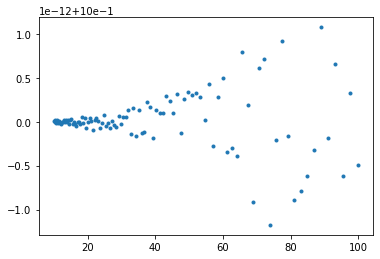

In [15]:
n = 100
barr = np.logspace( 1.0, 2.0, num=n )
unity = np.array(range(n),dtype=float)
for i in range(n):
    b = barr[i]
    delt = np.sqrt(b*b-1)
    r1 = b + delt 
    r2 = b - delt
    unity[i] = r1*r2
    
plt.plot( barr, unity, '.')
plt.show()

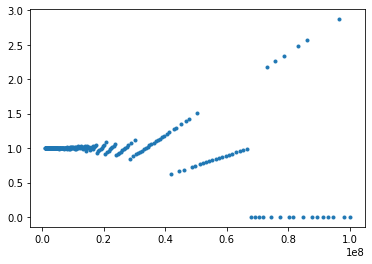

In [16]:
n = 250
barr = np.logspace( 6.0, 8.0, num=n )
unity = np.array(range(n),dtype=float)
for i in range(n):
    b = barr[i]
    delt = np.sqrt(b*b-1)
    r1 = b + delt 
    r2 = b - delt
    unity[i] = r1*r2
    
plt.plot( barr, unity, '.')
plt.show()

Inspection of those two plots ought to surprise you.  The first one is ok---the results are all $1$ to plus or minus $10^{-12}$, which is maybe a <i>bit</i> bigger rounding error than the $10^{-15}$ or so that we might be expecting, but it's not all that bad.  The product of the two computed roots is $1 \pm O(10^{-12})$.  Fine.

The second plot is, however, a shocker.  The vertical scale runs from $0$ to $3$.  Some of the products of the computed roots are as big as $3$, almost; and many of them are actually zero (which means that one of the computed roots is zero). Some of those blasted straight lines overlap, too.  Those results do not look to the unskilled eye like they reveal any rounding errors.  But that's exactly what's happening.

This, from the venerable quadratic formula, known since Babylonian times.

In detail: for large $b$, $b^2$ will be even larger.  Then, subtracting $1$ from $b^2$ will leave it close to the same; taking the square root again gets it nearly back to $b$, but not quite (even in exact arithmetic).  Then, subtracting this from $b$ will leave a small number.  Let's take a specific example, and track this in hex.

In [17]:
b = 2.0e5
print( 'b is ', b, 'which is ', b.hex(), ' in hex ')
delt = np.sqrt(b*b-1)
print( 'delt is ', delt, 'which is ', delt.hex(), ' in hex ')
r1 = b + delt 
print( 'r1 is ', r1, 'which is ', r1.hex(), 'in hex')
r2 = b - delt
print( 'r2 is ', r2, 'which is ', r2.hex(), 'in hex')


b is  200000.0 which is  0x1.86a0000000000p+17  in hex 
delt is  199999.9999975 which is  0x1.869fffffeb075p+17  in hex 
r1 is  399999.9999975 which is  0x1.869ffffff583ap+18 in hex
r2 is  2.4999899324029684e-06 which is  0x1.4f8b000000000p-19 in hex


We see that even for $b = 2\cdot 10^5$ that $\Delta = \sqrt{b^2-1}$ is not so different to $b$ itself, being about $2\cdot 10^5 (1- 10^{-11})$ (if we have counted the decimal 9s correctly).  In hex we see the digits 1.86a000000000000 and 1.869ffffffeb075. The f's are all in binary 1111, so we have a string of binary 1s that is 24 bits long; adding a 1 to the end of that causes a carry to chain all along those 24 bits, making the 9 turn into an a.  Subtracting those two things (which we apparently have to do to get $r_2$) will cancel out the 1.869ffffff with the 1.86a000000 which will cost us nine hexadecimal digits of significance and bring the lower 3 hexadecimal digits up to the front of the new number, the result. That is, we subtracted two nearly equal numbers, each about $2^{17}$, leaving a result about the size of $2^{-19}$ (to see where we got the $17$ and the $19$ just look at the values in the +p parts).  This means we have lost about 36 bits of precision (leaving just approximately 16 bits left).  We have made rounding errors earlier in computing $\Delta$: one when we multiplied the b's together, another when we subtracted the 1, and more when we took the square root.  All that information that would have wound up sitting below the 13 hexadecimal digits was lost when we formed $\Delta$.  Now when we subtract, the first nine hexadecimal digits are the same and cancel, leaving only four good hex digits and those rounding errors to move upward in significance.

This is called <i>catastrophic cancellation</i> when subtraction reveals earlier rounding errors.

Trying it for larger $b$, say $b=10^8$, gets zero for $r_2$ because <i>all</i> the good digits cancel out; then there are no significant digits left.

It might seem like a cheat, but the solution to this for this particular problem is not to do the subtraction at all.  Compute $r_1$ which adds instead of subtracts---there's still a rounding error in $\Delta$ but it's not revealed.  Then compute $r_2$ by $r_2 = 1/r_1$.  This gets us a perfectly accurate small root. 

This trick is important enough to be part of the canon.  For more general problems, we have to use other tricks.

Welcome to the seamy underbelly of numerical analysis. (Don't worry too much---most of the time we can treat floats as if they were just real numbers; it's only occasionally that weird stuff happens.)

In [18]:
b = 1.0e16
print( 'b in decimal is ', b, 'and in hex is ', b.hex() )
bigger = float.fromhex('0x1.1c37937e08001p+53')
print( 'The next machine representable number is ', bigger )
b = 1.0
print( 'b in decimal is ', b, 'and in hex is ', b.hex() )
bigger = float.fromhex('0x1.0000000000001p+0')
print( 'The next machine representable number is ', bigger )
print('The machine epsilon at 1 is ', bigger - b )

b in decimal is  1e+16 and in hex is  0x1.1c37937e08000p+53
The next machine representable number is  1.0000000000000002e+16
b in decimal is  1.0 and in hex is  0x1.0000000000000p+0
The next machine representable number is  1.0000000000000002
The machine epsilon at 1 is  2.220446049250313e-16


In [19]:
#  This will work in Python 3.9; until installed, commented out
#from math import nextafter, inf
#b = 1.0e16
#print( 'b in decimal is ', b, 'and in hex is ', b.hex() )
#bigger = nextafter(b, inf )
#print( 'next floating point number after b is ', bigger, 'and in hex is ', bigger.hex() )


Now let's try an example from a 1981 paper by W. Kahan, "Why do we need a floating-point arithmetic standard?" namely the evaluation of the rational function

$$
R(z) = 1 - \frac{3}{z-2 - \frac{1}{z-7 + \frac{10}{z-2 - \frac{2}{z-3}}}}
$$

which we may wish to write as $1 -  1/(z-2 - 1/(z-7 + 10/(z-2 - 2/(z-3))))$ which ought to translate nicely into Python.  Kahan calls this a one-liner, that ought to work just fine if the conventions described above are followed.

Unfortunately, we walk straight into a bog.  Python apparently <i>does not</i> follow the IEEE 754 standard, but instead breaks it on purpose.  On one discussion board from 2008, we find quotes that make RMC groan in pain: "If you're doing such serious number-crunching that you really want to handle NANs, you're probably not writing in Python anyway."

This isn't serious number crunching, it's just wanting to plot something that has removable discontinuities :(

and "For the vast majority of programming, division by zero is a mistake and not merely a degenerate case, so Python decided to treat it like one."

This attitude just makes life harder for Python programmers :(

The Matlab one-line program
```matlab
R = @(z) 1 -  1/(z-2 - 1/(z-7 + 10/(z-2 - 2/(z-3))))
```
and the Maple one-line program
```matlab
R := z -> 1 - 1/(z - 2 - 1/(z - 7 + 10/(z - 2 - 2/(z - 3))))
```

both work perfectly.  The Maple one is maybe the best, because if you call it with floats, e.g. R(1.0), you get the right answer by the IEEE arithmetic (to the <i>last bit</i>) whereas if you call it with integers, e.g. R(1), you get the error message "division by zero"

However, the <b>plot worked</b> even though it called R(1), R(2), R(3), R(4), and R(5).  This is because numpy (as opposed to plain Python) actually does use NaNs intelligently.  Whew!  And, looking at the plot, numpy got the right answers.  The difference is in the use of arrays, apparently (Thanks to Jack Betteridge for pointing this out).

<ipython-input-20-37065dcd677e>:1: RuntimeWarning: divide by zero encountered in double_scalars
  R = lambda z: 1.0-1.0/(z-2.0-1.0/(z-7.0+10.0/(z-2.0-2.0/(z-3.0))))


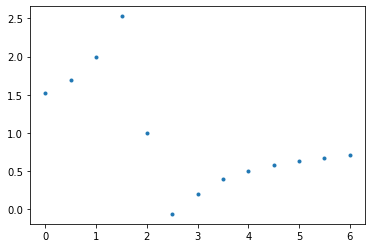

R(1) =  2.0 R(2) =  1.0 R(3) =  0.19999999999999996 R(4) =  0.5
It worked with NumPy 2.0
But would fail with native Python floats, which are different for some reason.  Commented out


<ipython-input-20-37065dcd677e>:1: RuntimeWarning: divide by zero encountered in double_scalars
  R = lambda z: 1.0-1.0/(z-2.0-1.0/(z-7.0+10.0/(z-2.0-2.0/(z-3.0))))


In [20]:
R = lambda z: 1.0-1.0/(z-2.0-1.0/(z-7.0+10.0/(z-2.0-2.0/(z-3.0))))
n = 13
x = np.linspace(0,6,num=n)
y = np.array(range(n),dtype=float)
for i in range(n):
    y[i] = R(x[i])
    #print( x[i], y[i])
plt.plot( x, y, '.' )
plt.show()

r1 = R( x[2] )
r2 = R( x[4] )
r3 = R( x[6] )
r4 = R( x[8] )
print( 'R(1) = ', r1, 'R(2) = ', r2, 'R(3) = ', r3, 'R(4) = ', r4 )
#np.seterr(divide='ignore')  # This command seems to be ignored its own self :(
worked = R( np.float64(1.0) )
print( 'It worked with NumPy', worked )
print( 'But would fail with native Python floats, which are different for some reason.  Commented out')
#didntwork = R( 1.0 )
# Should have been 2
#R(2)
# Should have been 1
#R(3)
# Should have been 1/5
#R(4)
# Should have been 1/2

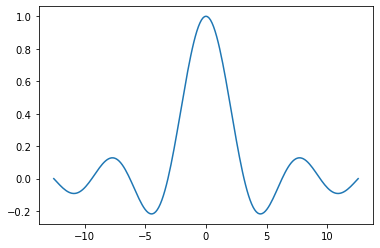

In [21]:
#
# Here's an example where the 0/0 occurs naturally in a plot
# and we DON'T want to fuss with special cases.  It's nice
# that NaNs allow this to work (in NumPy)

n = 201
x = np.linspace(-4*math.pi,4*math.pi,num=n)
y = np.array(range(n),dtype=float)
#np.seterr(divide='ignore')
for i in range(n):
    y[i] = math.sin(x[i])/x[i]
    #print( x[i], y[i])
plt.plot( x, y  )
plt.show()